# New

In [92]:
import mujoco
import numpy
import math
import matplotlib.pyplot as plt
import mediapy as media


In [93]:
# Turtle XML template
turtle_template = """
<mujoco>
    <option timestep="0.001">
        <flag gravity="enable" contact="enable"/>
    </option>

    <size nconmax="100" njmax="500"/>

    <default>
        <geom solimp="0.99 0.999 0.001" solref="0.001 1"/>
    </default>

    <compiler angle="degree" />
    <visual><global offwidth="{width}" offheight="{height}" /></visual>
        
    <asset>
        <texture name="floor_tex" type="2d" builtin="checker" rgb1="0.6 0.8 1" rgb2="1 1 1" width="512" height="512"/>
        <material name="floor_mat" texture="floor_tex" texrepeat="10 10" reflectance="0.3"/>
    </asset>

    <worldbody>
        <!-- Lighting -->
        <light name="top" pos="1 1 50"/>
        
        <!-- Cameras -->
        <camera name="target" mode="targetbody" target="trunk" pos="-0.1 -.15 .08" axisangle="1 0 0 90" />
    
        <body name="floor" pos="0 0 0">
            <!-- Checkered floor -->
            <geom name="floor" type="plane" size="5 5 0.1" rgba="0.8 0.9 1 1" material="floor_mat" pos="0 0 -0.0"/>
        </body>
        
        <body name="trunk" pos="0 0 .01">
            <joint type="free"/>
            <geom type="box" size="0.025 0.0175 0.0075" pos="0 0 0" rgba="0 1 0 .5" mass="0.4"/>

            <body name="leg_support1" pos="-.025 0.011 -0.0075"> 
                <geom type="box" size=".008 .0065 .001" pos="-.008 0 .001" rgba="0 0 1 1"/>
                <geom type="box" size=".001 .0065 .013" pos="-.016 0 -.013" rgba="0 0 1 1"/>
            </body>
            <body name="leg_support2" pos="-.025 -0.011 -0.0075"> 
                <geom type="box" size=".008 .0065 .001" pos="-.008 0 .001" rgba="0 0 1 1"/>
                <geom type="box" size=".001 .0065 .013" pos="-.016 0 -.013" rgba="0 0 1 1"/>
            </body>

            !-- LEG-1 -->
            <body name="leg1_l1" pos=".025 -.024 0"> 
                <geom type="box" size=".0141 .0065 .001" pos="0 0 0" rgba="0 0 1 1"/>  <!-- Horizontal first blue link -->

                <!-- LEG-1 Segment 1-->
                <body name="leg1_l2" pos=".0141 0 0">
                    <joint name="leg1_j2" type="hinge" axis="0 1 0"
                    stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                    <geom type="box" size=".015 .0065 .001" pos="0.015 0 0" rgba="0 1 0 .5"/>
                    <geom type="box" size=".0165 .0065 .001" pos="-0.0165 0 0" rgba="0 0 1 .5"/>
                    <body name="leg1_l4" pos=".03 0 0">
                        <joint name="leg1_j3" type="hinge" axis="0 1 0"
                        stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                        <geom type="box" size=".01125 .0065 .001" pos=".01125 0 0" rgba="1 0 0 1"/>
                    </body>

                    <!-- Horizontal leg extension -->
                    <body name="leg1_l5" pos="-.033 0 0" axisangle="0 1 0 90">
                        <joint name="leg1_j6" type="hinge" axis="0 1 0"
                        stiffness="0.01" damping="0.001" limited="true" range="0 100"/>
                        <geom type="box" size=".005 .0065 .001" pos=".005 0 0" rgba="1 0.6 0 1"/>
                    </body>
                </body>

                <!-- LEG-1 Segment 2-->
                <body name="leg1_l3" pos="-.0141 0 0">
                    <joint name="leg1_j4" type="hinge" axis="0 1 0"
                    stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                    <geom type="box" size=".0085 .0065 .001" pos="-.0085 0 0" rgba="0 1 0 1"/>
                    <body name="leg1_l4_2" pos="-.017 0 0">
                        <joint name="leg1_j5" type="hinge" axis="0 1 0"
                        stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                        <geom type="box" size=".01125 .0065 .001" pos="-.01125 0 0" rgba=".5 .5 .5 1"/>
                    </body>
                </body>
            </body>
            

            <!-- LEG-2 -->
            <body name="leg2_l1" pos=".025 .024 0"> 
                <geom type="box" size=".0141 .0065 .001" pos="0 0 0" rgba="0 0 1 1"/>

                <!-- LEG-2 Segment 1-->
                <body name="leg2_l2" pos=".0141 0 0">
                    <joint name="leg2_j2" type="hinge" axis="0 1 0"
                    stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                    <geom type="box" size=".015 .0065 .001" pos="0.015 0 0" rgba="0 1 0 .5"/>
                    <geom type="box" size=".0165 .0065 .001" pos="-0.0165 0 0" rgba="0 0 1 .5"/>
                    
                    <body name="leg2_l4" pos=".03 0 0">
                        <joint name="leg2_j3" type="hinge" axis="0 1 0"
                        stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                        <geom type="box" size=".01125 .0065 .001" pos=".01125 0 0" rgba="1 0 0 1"/>
                    </body>

                    <!-- Horizontal leg extension -->
                    <body name="leg2_l5" pos="-.033 0 0" axisangle="0 1 0 90">
                        <joint name="leg2_j6" type="hinge" axis="0 1 0"
                        stiffness="{k:e}" damping="{b:e}" limited="true" range="0 100"/>
                        <geom type="box" size=".005 .0065 .001" pos=".005 0 0" rgba="1 0.6 0 1"/>
                    </body>
                </body>

                <!-- LEG-2 Segment 2-->
                <body name="leg2_l3" pos="-.0141 0 0">
                    <joint name="leg2_j4" type="hinge" axis="0 1 0"
                    stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                    <geom type="box" size=".0085 .0065 .001" pos="-.0085 0 0" rgba="0 1 0 1"/>
                    <body name="leg2_l4_2" pos="-.017 0 0">
                        <joint name="leg2_j5" type="hinge" axis="0 1 0"
                        stiffness="{k:e}" damping="{b:e}" limited="true" range="-179 179"/>
                        <geom type="box" size=".01125 .0065 .001" pos="-.01125 0 0" rgba=".5 .5 .5 1"/>
                    </body>
                </body>
            </body>

        </body>
    </worldbody>

    <contact>
        <!-- Exclude consecutive links in leg1 -->
        <exclude body1="leg1_l1" body2="leg1_l2"/>
        <exclude body1="leg1_l1" body2="leg1_l3"/>
        <exclude body1="leg1_l2" body2="leg1_l4"/>
        <exclude body1="leg1_l2" body2="leg1_l5"/>
        <exclude body1="leg1_l3" body2="leg1_l4_2"/>
        
        <!-- Exclude consecutive links in leg2 -->
        <exclude body1="leg2_l1" body2="leg2_l2"/>
        <exclude body1="leg2_l1" body2="leg2_l3"/>
        <exclude body1="leg2_l2" body2="leg2_l4"/>
        <exclude body1="leg2_l2" body2="leg2_l5"/>
        <exclude body1="leg2_l3" body2="leg2_l4_2"/>
    </contact>
    
    <actuator>
        <position name="mR" joint="leg1_j4"/>
        <position name="mL" joint="leg2_j4"/>
    </actuator>
    
    <equality>
        <weld name="weld1" active="true" body1="leg1_l4" body2="leg1_l4_2"
        anchor="-.0225 0 0" relpose=".0225 0 0 1 0 0 0" solimp=".90 .99 .01" solref=".001 1"/>
        <weld name="weld2" active="true" body1="leg2_l4" body2="leg2_l4_2"
        anchor="-.0225 0 0" relpose=".0225 0 0 1 0 0 0" solimp=".90 .99 .01" solref=".001 1"/>
    </equality>
</mujoco>
"""

In [94]:

# Simulation parameters
width = 640
height = 480
duration = 10  # seconds
framerate = 120  # Hz

# Turtle gait parameters
amplitude = 30 * math.pi / 180  # Leg swing amplitude in radians
frequency = 1 # Gait frequency in Hz
phase_offset = 0.25  # Phase difference between legs (0.25 = 90 degrees out of phase)
leg_bias = 60 * math.pi / 180  # Baseline leg angle (negative = legs pointing backward)


def gen_controller(frequency, amplitude, phase_offset, leg_bias):
    """Generate controller function for turtle locomotion"""
    
    # We need to track accumulated phase
    phase_state = {'right_phase': 0, 'left_phase': 0, 'last_t': 0}
    
    def my_controller(model, data):
        t = data.time
        
        # Calculate dt
        if phase_state['last_t'] == 0:
            dt = 0.001  # First timestep
        else:
            dt = t - phase_state['last_t']
        phase_state['last_t'] = t
        
        # Gradually ramp up leg movement from 0 to full amplitude over first 2 seconds
        if t < 1:
            current_amplitude = 0
        else:
            current_amplitude = amplitude
        
        # Get current angles in cycle (0 to 2π)
        right_angle = phase_state['right_phase'] % (2 * math.pi)
        left_angle = phase_state['left_phase'] % (2 * math.pi)
        
        # Determine speed multiplier based on angle position
        # Fast in 1st and 4th quarters (0-90° and 270-360°)
        # Normal in 2nd and 3rd quarters (90-270°)
        
        # Right leg speed
        if right_angle < math.pi/2 or right_angle > 3*math.pi/2:
            right_speed = 4.0  # Double speed
        else:
            right_speed = 0.5  # Normal speed
        
        # Left leg speed
        if left_angle < math.pi/2 or left_angle > 3*math.pi/2:
            left_speed = 0.5  # Double speed
        else:
            left_speed = 4.0  # Normal speed
        
        # Update phases with variable speed
        phase_state['right_phase'] += right_speed * 2 * math.pi * frequency * dt
        phase_state['left_phase'] += left_speed * 2 * math.pi * frequency * dt
        
        # Calculate leg angles from accumulated phase
        right_leg_angle = current_amplitude * math.sin(phase_state['right_phase'] - 2 * math.pi * frequency * phase_offset) + leg_bias
        left_leg_angle = current_amplitude * math.sin(phase_state['left_phase']) + leg_bias
        
        # Apply control
        data.ctrl = [right_leg_angle, left_leg_angle]
    
    return my_controller


def run_sim(model, data, qpos, my_controller, show_video=True):
    """Run MuJoCo simulation and capture frames"""
    # CREATE NEW RENDERER each time
    renderer = mujoco.Renderer(model, width=width, height=height)
    
    mujoco.set_mjcb_control(my_controller)
    frames = []
    
    # Data collection for trunk
    trunk_data = {
        'time': [],
        'pos_x': [],
        'pos_y': [],
        'pos_z': [],
        'vel_x': [],
        'vel_y': [],
        'vel_z': []
    }
    
    mujoco.mj_resetData(model, data)
    data.qpos = qpos
    i = 1
    
    # Get trunk body ID
    trunk_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_BODY, 'trunk')
    
    while data.time < duration:
        mujoco.mj_step(model, data)
        
        # Collect trunk position and velocity
        trunk_data['time'].append(data.time)
        trunk_data['pos_x'].append(data.xpos[trunk_id][0])
        trunk_data['pos_y'].append(data.xpos[trunk_id][1])
        trunk_data['pos_z'].append(data.xpos[trunk_id][2])
        trunk_data['vel_x'].append(data.cvel[trunk_id][3])  # Linear velocity
        trunk_data['vel_y'].append(data.cvel[trunk_id][4])
        trunk_data['vel_z'].append(data.cvel[trunk_id][5])
        
        if len(frames) < data.time * framerate:
            renderer.update_scene(data, camera='target')
            pixels = renderer.render()
            frames.append(pixels)
            if i == 1:
                media.show_image(pixels)
                i += 1
    
    mujoco.set_mjcb_control(None)
    
    # Close renderer after use
    renderer.close()
    
    # Save trunk data to CSV
    import pandas as pd
    df = pd.DataFrame(trunk_data)
    df.to_csv('trunk_data.csv', index=False)
    print(f"Trunk data saved to 'trunk_data.csv' ({len(df)} timesteps)")
    
    if show_video:
        media.show_video(frames, fps=framerate, width=width, height=height)
    
    return frames, trunk_data


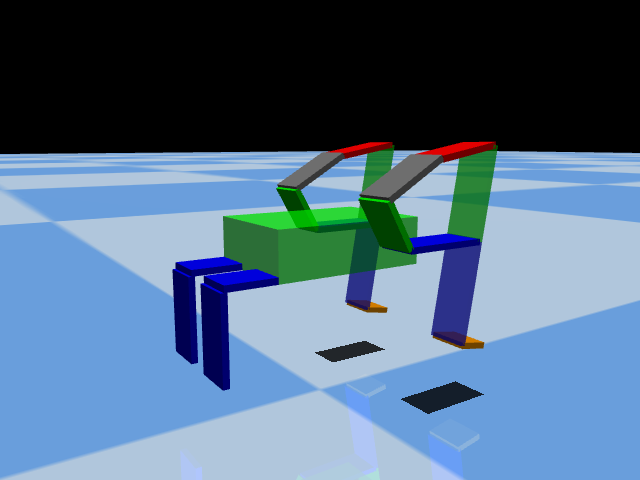

Trunk data saved to 'trunk_data.csv' (10001 timesteps)


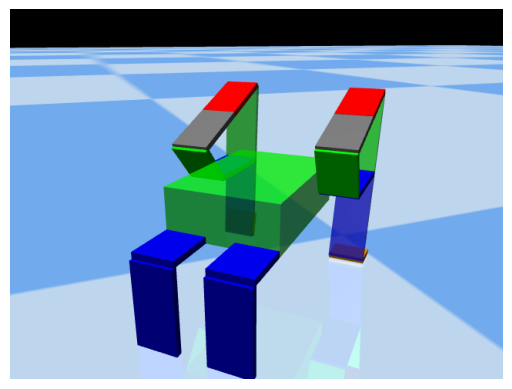

In [95]:

# Initialize model
xml = turtle_template.format(width=width, height=height, k=1e-5, b=1e-6)
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model, width=width, height=height)

# Set initial pose
zero_rotation = numpy.array([1, 0, 0, 0])
qpos1 = numpy.array([0, 0, 0.05])
qpos2 = numpy.array([-80, -110, 0, 60, 90]) * math.pi / 180 #value at the 4th place is for the new joint 
qpos3 = numpy.array([-80, -110, 0, 60, 90]) * math.pi / 180 #value at the 4th place is for the new joint 
qpos = numpy.hstack([qpos1, zero_rotation, qpos2, qpos3])

# Generate controller and run simulation
my_controller = gen_controller(frequency, amplitude, phase_offset, leg_bias)
frames, trunk_data = run_sim(model, data, qpos, my_controller, False)

# Display final frame
plt.imshow(frames[-1])
plt.axis('off')
plt.show()

# Show animation
media.show_video(frames, fps=framerate)

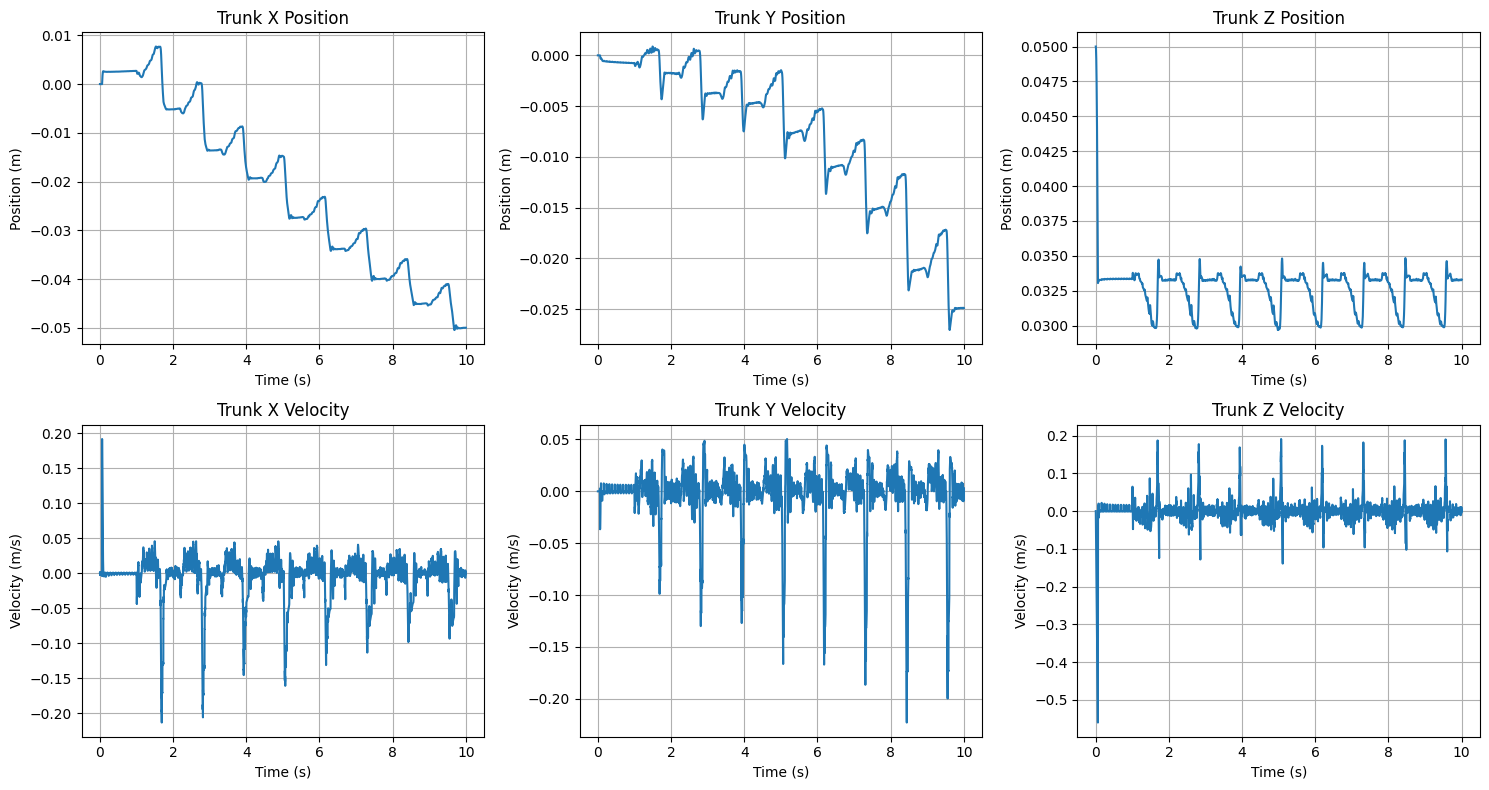

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Position plots
axes[0, 0].plot(trunk_data['time'], trunk_data['pos_x'])
axes[0, 0].set_title('Trunk X Position')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Position (m)')
axes[0, 0].grid(True)

axes[0, 1].plot(trunk_data['time'], trunk_data['pos_y'])
axes[0, 1].set_title('Trunk Y Position')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Position (m)')
axes[0, 1].grid(True)

axes[0, 2].plot(trunk_data['time'], trunk_data['pos_z'])
axes[0, 2].set_title('Trunk Z Position')
axes[0, 2].set_xlabel('Time (s)')
axes[0, 2].set_ylabel('Position (m)')
axes[0, 2].grid(True)

# Velocity plots
axes[1, 0].plot(trunk_data['time'], trunk_data['vel_x'])
axes[1, 0].set_title('Trunk X Velocity')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Velocity (m/s)')
axes[1, 0].grid(True)

axes[1, 1].plot(trunk_data['time'], trunk_data['vel_y'])
axes[1, 1].set_title('Trunk Y Velocity')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Velocity (m/s)')
axes[1, 1].grid(True)

axes[1, 2].plot(trunk_data['time'], trunk_data['vel_z'])
axes[1, 2].set_title('Trunk Z Velocity')
axes[1, 2].set_xlabel('Time (s)')
axes[1, 2].set_ylabel('Velocity (m/s)')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

In [97]:
# Print everything in qpos with labels
print("qpos (Generalized Positions):")

# Free joint (trunk) - first 7 values
print("\nTrunk (Free Joint):")
print(f"  Position X:     {data.qpos[0]:.6f}")
print(f"  Position Y:     {data.qpos[1]:.6f}")
print(f"  Position Z:     {data.qpos[2]:.6f}")
print(f"  Quaternion W:   {data.qpos[3]:.6f}")
print(f"  Quaternion X:   {data.qpos[4]:.6f}")
print(f"  Quaternion Y:   {data.qpos[5]:.6f}")
print(f"  Quaternion Z:   {data.qpos[6]:.6f}")

# Joint angles - remaining values
print("\nJoint Angles (radians):")
joint_start_idx = 7  # Joints start after the free joint (7 DOF)
for i in range(model.njnt):
    if model.joint(i).type[0] != 0:  # Skip free joint (already printed)
        joint_name = model.joint(i).name
        qpos_idx = joint_start_idx
        angle_deg = data.qpos[qpos_idx] * 180 / math.pi
        print(f"  [{qpos_idx:2d}] {joint_name:15s}: {data.qpos[qpos_idx]:8.4f} rad ({angle_deg:7.2f}°)")
        joint_start_idx += 1

# Print total
print(f"\nTotal qpos size: {model.nq}")
print(f"Full qpos array:\n{data.qpos}")

qpos (Generalized Positions):

Trunk (Free Joint):
  Position X:     -0.050003
  Position Y:     -0.024914
  Position Z:     0.033302
  Quaternion W:   0.925145
  Quaternion X:   -0.000650
  Quaternion Y:   0.002558
  Quaternion Z:   0.379604

Joint Angles (radians):
  [ 7] leg1_j2        :  -1.3009 rad ( -74.53°)
  [ 8] leg1_j3        :  -2.1423 rad (-122.75°)
  [ 9] leg1_j6        :  -0.2239 rad ( -12.83°)
  [10] leg1_j4        :   1.1481 rad (  65.78°)
  [11] leg1_j5        :   1.6928 rad (  96.99°)
  [12] leg2_j2        :  -1.5006 rad ( -85.98°)
  [13] leg2_j3        :  -2.0335 rad (-116.51°)
  [14] leg2_j6        :  -1.4004 rad ( -80.24°)
  [15] leg2_j4        :   0.8461 rad (  48.48°)
  [16] leg2_j5        :   1.9035 rad ( 109.06°)

Total qpos size: 17
Full qpos array:
[-5.00029135e-02 -2.49140253e-02  3.33022219e-02  9.25145310e-01
 -6.49925358e-04  2.55794535e-03  3.79603991e-01 -1.30085497e+00
 -2.14233212e+00 -2.23890419e-01  1.14807561e+00  1.69278308e+00
 -1.50061120e+00 -2